<a href="https://colab.research.google.com/github/SH22Hwang/GNU_AugumentedIntelligenceLab/blob/main/eunsun/chap10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[10.1] 10.4절의 SimpleRNN모델의 입력 input_shape = [seq_length, 2]로 지정하면 파라미터 몇개 되는지 확인

In [2]:
import numpy as np
import tensorflow as tf

size, seq_len = 100, 3

X = np.empty(shape=(size,seq_len,1))
Y = np.empty(shape=(size,))

for i in range(size):
  c = np.linspace(i/10., (i+seq_len-1)/10., seq_len)
  X[i] = c[:,np.newaxis]
  Y[i] = (i+seq_len) / 10

for i in range(len(X)):
  print(X[i], Y[i])

[[0. ]
 [0.1]
 [0.2]] 0.3
[[0.1]
 [0.2]
 [0.3]] 0.4
[[0.2]
 [0.3]
 [0.4]] 0.5
[[0.3]
 [0.4]
 [0.5]] 0.6
[[0.4]
 [0.5]
 [0.6]] 0.7
[[0.5]
 [0.6]
 [0.7]] 0.8
[[0.6]
 [0.7]
 [0.8]] 0.9
[[0.7]
 [0.8]
 [0.9]] 1.0
[[0.8]
 [0.9]
 [1. ]] 1.1
[[0.9]
 [1. ]
 [1.1]] 1.2
[[1. ]
 [1.1]
 [1.2]] 1.3
[[1.1]
 [1.2]
 [1.3]] 1.4
[[1.2]
 [1.3]
 [1.4]] 1.5
[[1.3]
 [1.4]
 [1.5]] 1.6
[[1.4]
 [1.5]
 [1.6]] 1.7
[[1.5]
 [1.6]
 [1.7]] 1.8
[[1.6]
 [1.7]
 [1.8]] 1.9
[[1.7]
 [1.8]
 [1.9]] 2.0
[[1.8]
 [1.9]
 [2. ]] 2.1
[[1.9]
 [2. ]
 [2.1]] 2.2
[[2. ]
 [2.1]
 [2.2]] 2.3
[[2.1]
 [2.2]
 [2.3]] 2.4
[[2.2]
 [2.3]
 [2.4]] 2.5
[[2.3]
 [2.4]
 [2.5]] 2.6
[[2.4]
 [2.5]
 [2.6]] 2.7
[[2.5]
 [2.6]
 [2.7]] 2.8
[[2.6]
 [2.7]
 [2.8]] 2.9
[[2.7]
 [2.8]
 [2.9]] 3.0
[[2.8]
 [2.9]
 [3. ]] 3.1
[[2.9]
 [3. ]
 [3.1]] 3.2
[[3. ]
 [3.1]
 [3.2]] 3.3
[[3.1]
 [3.2]
 [3.3]] 3.4
[[3.2]
 [3.3]
 [3.4]] 3.5
[[3.3]
 [3.4]
 [3.5]] 3.6
[[3.4]
 [3.5]
 [3.6]] 3.7
[[3.5]
 [3.6]
 [3.7]] 3.8
[[3.6]
 [3.7]
 [3.8]] 3.9
[[3.7]
 [3.8]
 [3.9]] 4.0
[[3.8]
 [3.9

In [11]:
model = tf.keras.Sequential([
                            tf.keras.layers.SimpleRNN(units = 20, return_sequences=False,
                                                      #input_shape=[seq_len,2]),
                                                      input_shape=[3,1]),
                            tf.keras.layers.Dense(1)
])

model.compile(optimizer = 'adam', loss = 'mse')
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_4 (SimpleRNN)     (None, 20)                440       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 21        
Total params: 461
Trainable params: 461
Non-trainable params: 0
_________________________________________________________________


[10.4] 유닛 개수를 늘리는 것과 순환 셀 계층을 늘리는 것의 파라미터 증가량을 비교하라

Epoch 1/300
4/4 [==============================] - 0s 4ms/step - loss: 19.2193
Epoch 2/300
4/4 [==============================] - 0s 4ms/step - loss: 18.4892
Epoch 3/300
4/4 [==============================] - 0s 4ms/step - loss: 17.7816
Epoch 4/300
4/4 [==============================] - 0s 4ms/step - loss: 17.0857
Epoch 5/300
4/4 [==============================] - 0s 5ms/step - loss: 16.4730
Epoch 6/300
4/4 [==============================] - 0s 4ms/step - loss: 15.8837
Epoch 7/300
4/4 [==============================] - 0s 4ms/step - loss: 15.2687
Epoch 8/300
4/4 [==============================] - 0s 4ms/step - loss: 14.7115
Epoch 9/300
4/4 [==============================] - 0s 4ms/step - loss: 14.1496
Epoch 10/300
4/4 [==============================] - 0s 5ms/step - loss: 13.6149
Epoch 11/300
4/4 [==============================] - 0s 4ms/step - loss: 13.1180
Epoch 12/300
4/4 [==============================] - 0s 4ms/step - loss: 12.6518
Epoch 13/300
4/4 [==============================]

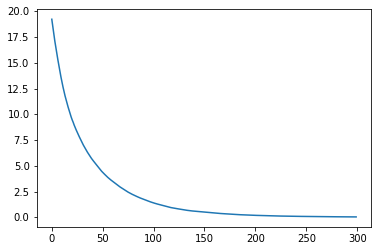

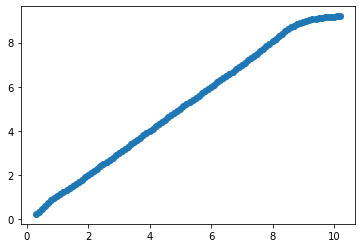

In [13]:
import matplotlib.pyplot as plt

history = model.fit(X,Y, epochs=300)
plt.plot(history.history['loss'])
plt.show()
y_hat = model.predict(X)
plt.scatter(Y, y_hat)
plt.show()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_7 (SimpleRNN)     (None, 256)               66048     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 257       
Total params: 66,305
Trainable params: 66,305
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
4/4 [==============================] - 1s 10ms/step - loss: 16.4947
Epoch 2/300
4/4 [==============================] - 0s 7ms/step - loss: 4.5168
Epoch 3/300
4/4 [==============================] - 0s 8ms/step - loss: 2.6953
Epoch 4/300
4/4 [==============================] - 0s 8ms/step - loss: 2.1160
Epoch 5/300
4/4 [==============================] - 0s 8ms/step - loss: 0.9819
Epoch 6/300
4/4 [==============================] - 0s 8ms/step - loss: 1.0956
Epoch 7/300
4/4 [=========================

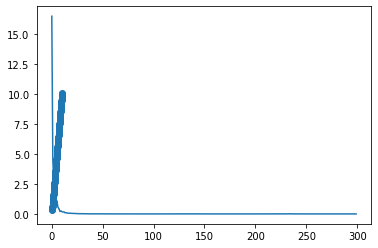

In [17]:
model256 = tf.keras.Sequential([
                                tf.keras.layers.SimpleRNN(units = 256, return_sequences=False,
                                                          input_shape=[3,1]),
                                tf.keras.layers.Dense(1)
])

model256.compile(optimizer = 'adam', loss= 'mse')
model256.summary()
history = model256.fit(X,Y, epochs=300)
plt.plot(history.history['loss'])

y_hat = model256.predict(X)
plt.scatter(Y, y_hat)

In [18]:
model_multilayer = tf.keras.Sequential([
                                        tf.keras.layers.SimpleRNN( units = 34, input_shape=[3,1],
                                                                  return_sequences=True),
                                        tf.keras.layers.SimpleRNN( units = 34, return_sequences=True),
                                        tf.keras.layers.SimpleRNN( units = 34, return_sequences=True),
                                        tf.keras.layers.SimpleRNN( units = 34, return_sequences=True),
                                        tf.keras.layers.SimpleRNN( units = 34),
                                        tf.keras.layers.Dense(1) ])
model_multilayer.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_8 (SimpleRNN)     (None, 3, 34)             1224      
_________________________________________________________________
simple_rnn_9 (SimpleRNN)     (None, 3, 34)             2346      
_________________________________________________________________
simple_rnn_10 (SimpleRNN)    (None, 3, 34)             2346      
_________________________________________________________________
simple_rnn_11 (SimpleRNN)    (None, 3, 34)             2346      
_________________________________________________________________
simple_rnn_12 (SimpleRNN)    (None, 34)                2346      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 35        
Total params: 10,643
Trainable params: 10,643
Non-trainable params: 0
__________________________________________________